In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
import operator as op
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')

# GitHub
sys.path.insert(0, pjoin(git_dir, 'Ca-fMRI'))
from register.register import *
from analysis.cluster import Clusters
from analysis.hierarchical import *
from analysis.network import *
from utils.plotting import *
from utils.render import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Register

In [3]:
register_anat_data()

  0%|          | 0/30 [00:00<?, ?it/s]

sub-SLC01_ses-1,        best rel mi: 0.444

sub-SLC01_ses-2,        best rel mi: 0.45

sub-SLC01_ses-3,        best rel mi: 0.446

sub-SLC02_ses-1,        best rel mi: 0.443

sub-SLC02_ses-2,        best rel mi: 0.442

sub-SLC02_ses-3,        best rel mi: 0.453

sub-SLC03_ses-1,        best rel mi: 0.435

sub-SLC03_ses-2,        best rel mi: 0.445

sub-SLC03_ses-3,        best rel mi: 0.444

sub-SLC04_ses-1,        best rel mi: 0.459

sub-SLC04_ses-2,        best rel mi: 0.47

sub-SLC04_ses-3,        best rel mi: 0.462

sub-SLC05_ses-1,        best rel mi: 0.437

sub-SLC05_ses-2,        best rel mi: 0.432

sub-SLC05_ses-3,        best rel mi: 0.435

sub-SLC06_ses-1,        best rel mi: 0.451

sub-SLC06_ses-2,        best rel mi: 0.43

sub-SLC06_ses-3,        best rel mi: 0.447

sub-SLC07_ses-1,        best rel mi: 0.435

sub-SLC07_ses-2,        best rel mi: 0.451

sub-SLC07_ses-3,        best rel mi: 0.433

sub-SLC08_ses-1,        best rel mi: 0.447

sub-SLC08_ses-2,        best rel mi: 0.44

sub-SLC08_ses-3,        best rel mi: 0.44

sub-SLC09_ses-1,        best rel mi: 0.454

sub-SLC09_ses-2,        best rel mi: 0.464

sub-SLC09_ses-3,        best rel mi: 0.458

sub-SLC10_ses-1,        best rel mi: 0.445

sub-SLC10_ses-2,        best rel mi: 0.438

sub-SLC10_ses-3,        best rel mi: 0.403

### Visually inspect results

sub-SLC01_ses-1

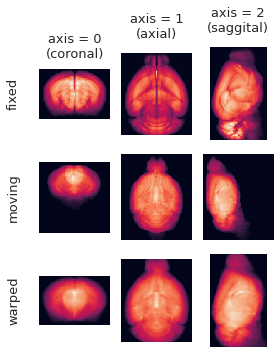

sub-SLC01_ses-2

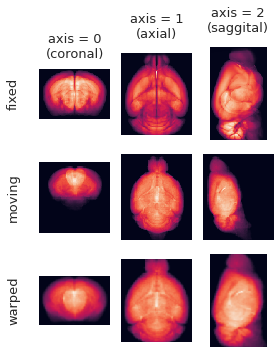

sub-SLC01_ses-3

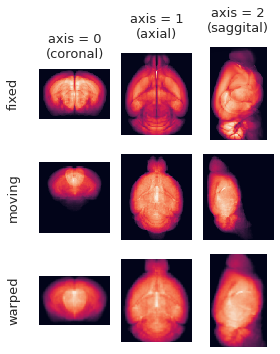

sub-SLC02_ses-1

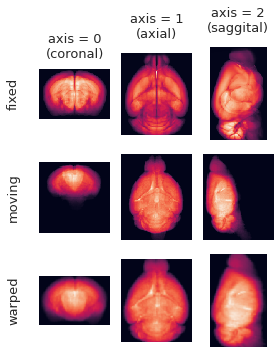

sub-SLC02_ses-2

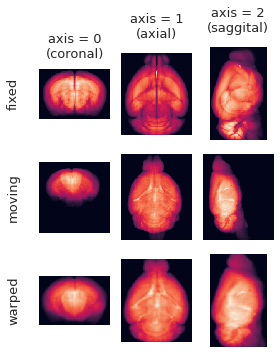

sub-SLC02_ses-3

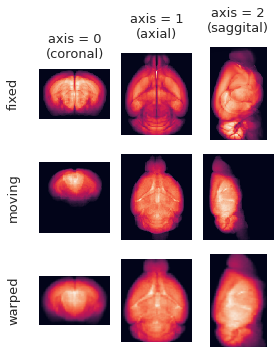

sub-SLC03_ses-1

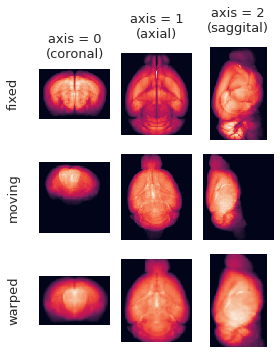

sub-SLC03_ses-2

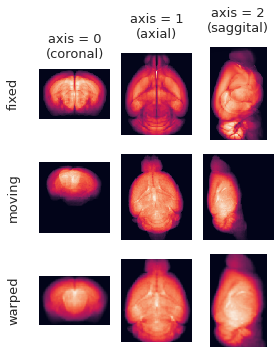

sub-SLC03_ses-3

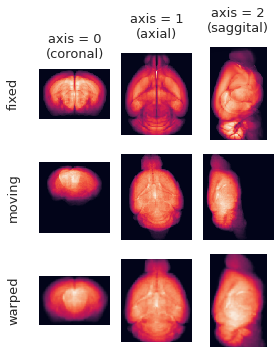

sub-SLC04_ses-1

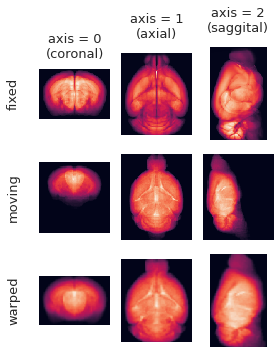

sub-SLC04_ses-2

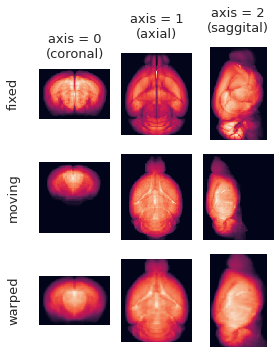

sub-SLC04_ses-3

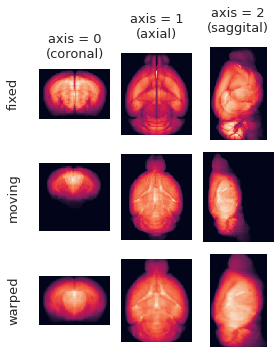

sub-SLC05_ses-1

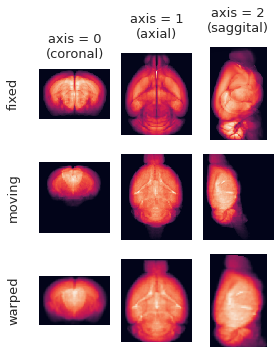

sub-SLC05_ses-2

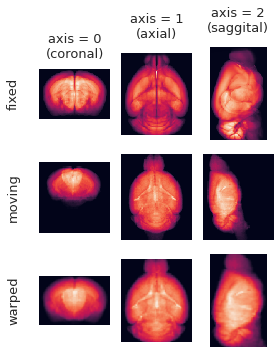

sub-SLC05_ses-3

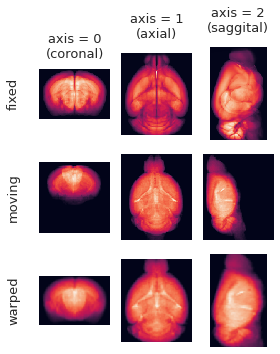

sub-SLC06_ses-1

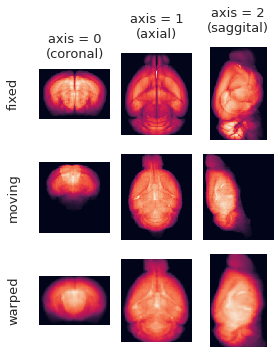

sub-SLC06_ses-2

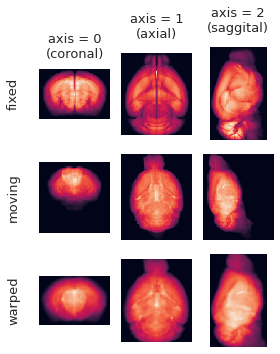

sub-SLC06_ses-3

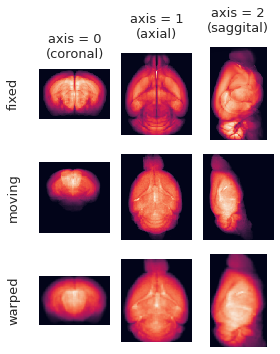

sub-SLC07_ses-1

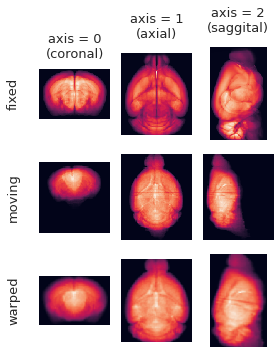

sub-SLC07_ses-2

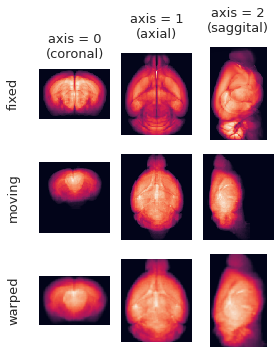

sub-SLC07_ses-3

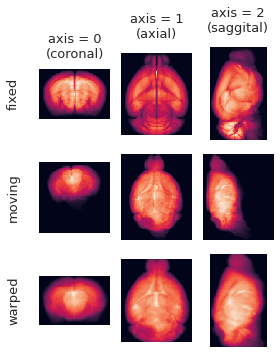

sub-SLC08_ses-1

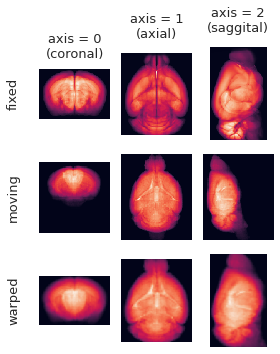

sub-SLC08_ses-2

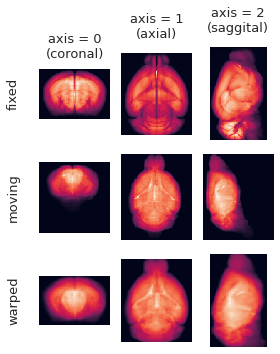

sub-SLC08_ses-3

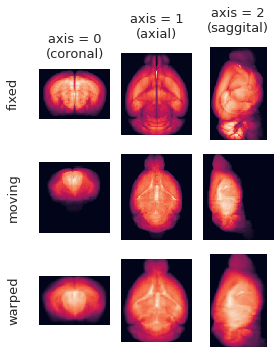

sub-SLC09_ses-1

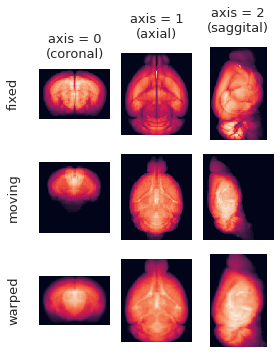

sub-SLC09_ses-2

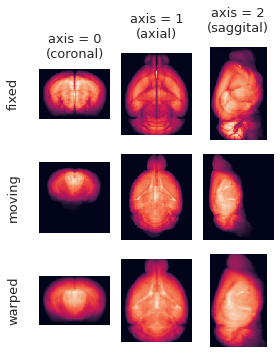

sub-SLC09_ses-3

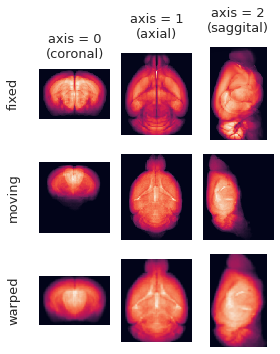

sub-SLC10_ses-1

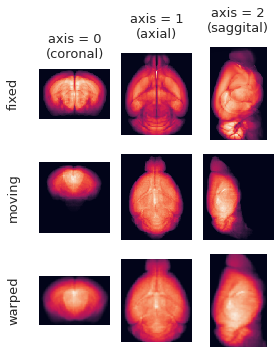

sub-SLC10_ses-2

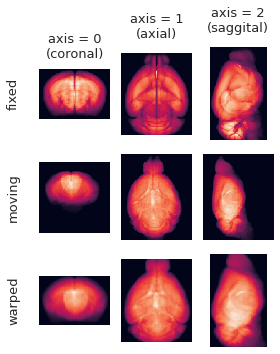

sub-SLC10_ses-3

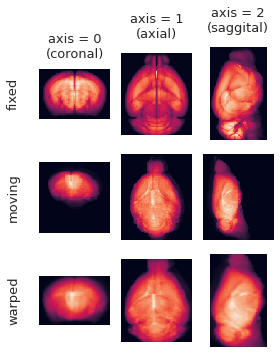

In [4]:
fixed = reset_ants_img(allen['template'])

for key, anat in mice.T1w.items():
    moving = anat.get_npy_data()
    moving = reorient_arr(moving)
    moving = reset_ants_img(moving)
    
    warped_file = next(x for x in os.listdir(mice.cfg.warped_dir) if key in x)
    warped = ants.image_read(pjoin(mice.cfg.warped_dir, warped_file))
    
    print(key)
    _ = plot_registration(
        fixed=fixed,
        moving=moving,
        warped=warped,
        sup=False,
        figsize=(4, 5),
    )
    print('\n\n\n')

## Organize Func data

### n = 128

In [3]:
organize_func_data(Mice(Config(128)))

Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


allen mouse atlas (res. 100um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )


  0%|          | 0/30 [00:00<?, ?it/s]

[PROGRESS] 'sub-SLC01_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC01_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC01_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC02_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC02_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC02_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC03_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC03_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC03_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC04_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC04_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC04_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC05_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC05_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC05_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC06_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC06_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC06_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC07_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC07_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC07_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC08_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC08_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC08_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC09_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC09_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC09_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC10_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC10_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

[PROGRESS] 'sub-SLC10_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/masks

  0%|          | 0/210 [00:00<?, ?it/s]

[PROGRESS] 'sub-SLC01_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC01_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-2_run-7_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC02_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-1_run-2_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-1_run-3_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-1_run-4_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-1_run-5_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-1_run-6_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-1_run-7_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC03_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC04_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC05_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC06_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC07_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC08_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC09_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

[PROGRESS] 'sub-SLC10_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-128/bold

### n = 256

In [3]:
organize_func_data(Mice(Config(256)))

Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


allen mouse atlas (res. 100um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )


  0%|          | 0/30 [00:00<?, ?it/s]

[PROGRESS] 'sub-SLC01_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC01_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC01_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC02_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC02_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC02_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC03_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC03_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC03_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC04_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC04_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC04_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC05_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC05_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC05_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC06_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC06_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC06_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC07_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC07_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC07_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC08_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC08_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC08_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC09_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC09_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC09_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC10_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC10_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

[PROGRESS] 'sub-SLC10_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/masks

  0%|          | 0/210 [00:00<?, ?it/s]

[PROGRESS] 'sub-SLC01_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC01_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-2_run-7_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC02_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-1_run-2_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-1_run-3_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-1_run-4_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-1_run-5_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-1_run-6_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-1_run-7_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC03_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC04_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC05_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC06_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC07_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC08_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC09_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

[PROGRESS] 'sub-SLC10_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-256/bold

### n = 512

In [2]:
organize_func_data(Mice(Config(512)))

...merging dicts: 0it [00:00, ?it/s]

...merging dicts: 0it [00:00, ?it/s]

Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


allen mouse atlas (res. 100um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )


  0%|          | 0/30 [00:00<?, ?it/s]

[PROGRESS] 'sub-SLC01_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC01_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC01_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC02_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC02_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC02_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC03_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC03_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC03_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC04_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC04_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC04_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC05_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC05_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC05_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC06_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC06_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC06_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC07_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC07_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC07_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC08_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC08_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC08_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC09_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC09_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC09_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC10_ses-1_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC10_ses-2_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

[PROGRESS] 'sub-SLC10_ses-3_space-CCF_atlas3d-inv.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/masks

  0%|          | 0/210 [00:00<?, ?it/s]

[PROGRESS] 'sub-SLC01_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC01_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-2_run-7_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC02_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-1_run-2_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-1_run-3_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-1_run-4_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-1_run-5_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-1_run-6_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-1_run-7_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC03_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC04_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC05_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC06_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC07_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC08_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC09_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-1_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-1_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-1_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-1_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-1_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-1_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-1_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-2_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-2_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-2_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-2_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-2_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-2_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-2_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-3_run-1_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-3_run-2_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-3_run-3_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-3_run-4_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-3_run-5_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-3_run-6_task-led_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold

[PROGRESS] 'sub-SLC10_ses-3_run-7_task-rest_space-CCF_desc-proc_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/kmeans-512/bold